### SVM(Support Vector Machine)
- ML에서 오랫동안 연구되었고 성능이 좋은 모델
- DL보다 성능이 좋은 경우도 있음


In [42]:
# 모듈 로딩
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [43]:
import warnings

warnings.filterwarnings(action='ignore')

[1] 데이터 로딩 및 확인

<Figure size 432x288 with 0 Axes>

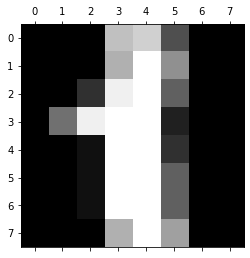

In [44]:
digits = load_digits()
plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [45]:
data = digits['data']
target = digits['target']

In [46]:
target[1], digits.images[1]

(1,
 array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]))

[2] 학습 데이터 준비

In [47]:
# 학습용/테스트용 데이터 분리 => 8:2
train_input, test_input, train_target, test_target = train_test_split(
                                                data, target, test_size=0.2, random_state=42)

In [48]:
train_input.shape, test_input.shape

((1437, 64), (360, 64))

In [49]:
# 표준화 평균 0, 표준편차 1
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

##### 1. LR

[3] 모델 생성 및 학습

In [50]:
from sklearn.linear_model import LogisticRegression

# 다중분류
model = LogisticRegression(multi_class='multinomial')

# 학습
model.fit(train_input, train_target)

LogisticRegression(multi_class='multinomial')

In [51]:
# 표준화한 모델
model2 = LogisticRegression(multi_class='multinomial')
model2.fit(train_scaled, train_target)

LogisticRegression(multi_class='multinomial')

[4] 모델 평가

In [52]:
print('train score:', model.score(train_input, train_target))
print('test score:', model.score(test_input, test_target))

train score: 1.0
test score: 0.9694444444444444


In [53]:
# 표준화한 모델
print('train score:', model2.score(train_scaled, train_target))
print('test score:', model2.score(test_scaled, test_target))

train score: 0.9986082115518441
test score: 0.9722222222222222


[5] 테스트 -> predict() 

In [54]:
def drawImage(data):
    plt.gray()
    plt.matshow(data.reshape(8, 8))
    plt.show()

In [55]:
test_input[100], test_target[100]

(array([ 0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         5.,  0.,  0.,  0.,  0.,  1., 16., 16.,  5.,  0.,  0.,  0.,  0.,
        11., 16., 16.,  1.,  1.,  0.,  0.,  6., 16., 16., 16., 15.,  9.,
         0.,  0.,  7., 15., 16., 16., 10.,  1.,  0.,  0.,  0.,  1.,  7.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  5.,  0.,  0.]),
 4)

In [56]:
for i in range(10):
    print(i, model.predict([digits['data'][i]]))

0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
6 [6]
7 [7]
8 [8]
9 [9]


In [57]:
preY = model.predict([[ 0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         5.,  0.,  0.,  0.,  0.,  1., 16., 16.,  5.,  0.,  0.,  0.,  0.,
        11., 16., 16.,  1.,  1.,  0.,  0.,  6., 16., 16., 16., 15.,  9.,
         0.,  0.,  7., 15., 16., 16., 10.,  1.,  0.,  0.,  0.,  1.,  7.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  5.,  0.,  0.]])
print('예측 결과 값:',preY)

예측 결과 값: [4]


<Figure size 432x288 with 0 Axes>

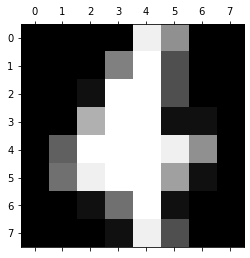

In [58]:
drawImage(test_input[100])

In [59]:
test_scaled[200], test_target[200]

(array([ 0.        , -0.34169755,  0.99272923,  0.0415787 ,  0.0255404 ,
         1.6262722 ,  0.77307606, -0.13101874, -0.06103492, -0.61725402,
         1.04231191, -0.9976119 , -0.49951228, -0.53813097,  0.30292926,
        -0.13336005, -0.04991522,  0.41090742,  0.91344677,  0.14825839,
        -0.18464006, -1.27307852, -0.552537  , -0.11409248, -0.03733267,
         1.19042013,  0.97580609,  0.52549465,  0.66326183,  0.07651178,
        -0.62554872, -0.04573894,  0.        , -0.65547642, -1.03737417,
        -1.44495478, -1.40758447,  1.26001861, -0.81347241,  0.        ,
        -0.06519029, -0.520056  , -1.05122024, -1.13725613, -1.23504336,
         1.00362917, -0.10732033, -0.09403434, -0.03963009, -0.40241459,
         0.6110394 , -1.07225551, -0.27909905,  1.02207001, -0.15187938,
        -0.21608405, -0.02638899, -0.30677646,  0.86457466,  0.89164719,
         0.6435399 , -0.30507483, -0.50623083, -0.19710003]),
 5)

In [60]:
preY = model2.predict([[ 0.        , -0.34169755,  0.99272923,  0.0415787 ,  0.0255404 ,
         1.6262722 ,  0.77307606, -0.13101874, -0.06103492, -0.61725402,
         1.04231191, -0.9976119 , -0.49951228, -0.53813097,  0.30292926,
        -0.13336005, -0.04991522,  0.41090742,  0.91344677,  0.14825839,
        -0.18464006, -1.27307852, -0.552537  , -0.11409248, -0.03733267,
         1.19042013,  0.97580609,  0.52549465,  0.66326183,  0.07651178,
        -0.62554872, -0.04573894,  0.        , -0.65547642, -1.03737417,
        -1.44495478, -1.40758447,  1.26001861, -0.81347241,  0.        ,
        -0.06519029, -0.520056  , -1.05122024, -1.13725613, -1.23504336,
         1.00362917, -0.10732033, -0.09403434, -0.03963009, -0.40241459,
         0.6110394 , -1.07225551, -0.27909905,  1.02207001, -0.15187938,
        -0.21608405, -0.02638899, -0.30677646,  0.86457466,  0.89164719,
         0.6435399 , -0.30507483, -0.50623083, -0.19710003]])
print('예측 결과 값:',preY)

예측 결과 값: [5]


<Figure size 432x288 with 0 Axes>

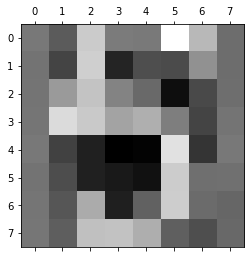

In [61]:
drawImage(test_scaled[200])

##### 2. SVC

[3] 모델 생성 및 학습

In [62]:
# SVC
model = SVC(gamma=0.001, C=1.0)
model.fit(train_input, train_target)

SVC(gamma=0.001)

In [63]:
# 표준화한 모델
model2 = SVC(gamma=0.001, C=2.0)
model2.fit(train_scaled, train_target)

SVC(C=2.0, gamma=0.001)

[4] 모델 평가

In [64]:
print('train score:', model.score(train_input, train_target))
print('test score:', model.score(test_input, test_target))

train score: 0.9979123173277662
test score: 0.9888888888888889


In [65]:
# 표준화한 모델
print('train score:', model2.score(train_scaled, train_target))
print('test score:', model2.score(test_scaled, test_target))

train score: 0.9742519137091162
test score: 0.9666666666666667


[5] 테스트 -> predict() 

In [66]:
preY = model.predict([[ 0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
         5.,  0.,  0.,  0.,  0.,  1., 16., 16.,  5.,  0.,  0.,  0.,  0.,
        11., 16., 16.,  1.,  1.,  0.,  0.,  6., 16., 16., 16., 15.,  9.,
         0.,  0.,  7., 15., 16., 16., 10.,  1.,  0.,  0.,  0.,  1.,  7.,
        16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  5.,  0.,  0.]])
print('예측 결과 값:',preY)

예측 결과 값: [4]


In [67]:
for i in range(10):
    print(i, model.predict([digits['data'][i]]))

0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [9]
6 [6]
7 [7]
8 [8]
9 [9]


In [68]:
preY = model2.predict([[ 0.        , -0.34169755,  0.99272923,  0.0415787 ,  0.0255404 ,
         1.6262722 ,  0.77307606, -0.13101874, -0.06103492, -0.61725402,
         1.04231191, -0.9976119 , -0.49951228, -0.53813097,  0.30292926,
        -0.13336005, -0.04991522,  0.41090742,  0.91344677,  0.14825839,
        -0.18464006, -1.27307852, -0.552537  , -0.11409248, -0.03733267,
         1.19042013,  0.97580609,  0.52549465,  0.66326183,  0.07651178,
        -0.62554872, -0.04573894,  0.        , -0.65547642, -1.03737417,
        -1.44495478, -1.40758447,  1.26001861, -0.81347241,  0.        ,
        -0.06519029, -0.520056  , -1.05122024, -1.13725613, -1.23504336,
         1.00362917, -0.10732033, -0.09403434, -0.03963009, -0.40241459,
         0.6110394 , -1.07225551, -0.27909905,  1.02207001, -0.15187938,
        -0.21608405, -0.02638899, -0.30677646,  0.86457466,  0.89164719,
         0.6435399 , -0.30507483, -0.50623083, -0.19710003]])
print('예측 결과 값:',preY)

예측 결과 값: [5]
